In [3]:
import pandas as pd
import numpy as np
import os 
import math

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl
import seaborn as sns 

In [4]:
plot_params = {
    'font.family': 'Ubuntu',
    'font.weight': 'light',
    
    'figure.figsize': (5,5),
    'figure.frameon': False, 
    'figure.titlesize': 'xx-large',
    'figure.titleweight': 'normal',
    
    'axes.titlesize': 'large',
    'axes.titlecolor': 'black',
    'axes.titleweight': 'normal',
    'axes.titlelocation': 'center',
    'axes.labelsize': 'x-large',
    
    'grid.alpha': .25, 
    'legend.frameon':False,
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
}

pylab.rcParams.update(plot_params)
sns.set_palette('mako')

In [ ]:
# classification_metric: MAP@K

In [5]:
data_folder = 'data'
train_data_fname = 'train.csv'
test_data_fname = 'test.csv'
external_data_fname = 'external_data.csv'
sample_submission_fname = 'sample_submission.csv'



In [6]:
train_data_path = os.path.join(data_folder, train_data_fname)
test_data_path = os.path.join(data_folder, test_data_fname)
external_data_path = os.path.join(data_folder, external_data_fname)
sample_data_path = os.path.join(data_folder, sample_submission_fname)

In [7]:
!ls

baseline_12.ipynb  data  data-source  eda.ipynb  predictions


In [8]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
external_data = pd.read_csv(external_data_path)
sample_data = pd.read_csv(sample_data_path)

In [9]:
TARGET = 'prognosis'
RANDOM_SEED = 321
FEATURES = train_data.drop(['id','prognosis'], axis = 1).columns.tolist()

In [10]:
set(train_data.columns.tolist()).difference(set(external_data.columns.tolist()))

{'id'}

In [11]:
print(train_data.shape)
print(test_data.shape)
print(external_data.shape)


(707, 66)
(303, 65)
(252, 65)


In [12]:
train_data.columns

Index(['id', 'sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed',
       'muscle_pain', 'joint_pain', 'vomiting', 'rash', 'diarrhea',
       'hypotension', 'pleural_effusion', 'ascites', 'gastro_bleeding',
       'swelling', 'nausea', 'chills', 'myalgia', 'digestion_trouble',
       'fatigue', 'skin_lesions', 'stomach_pain', 'orbital_pain', 'neck_pain',
       'weakness', 'back_pain', 'weight_loss', 'gum_bleed', 'jaundice', 'coma',
       'diziness', 'inflammation', 'red_eyes', 'loss_of_appetite',
       'urination_loss', 'slow_heart_rate', 'abdominal_pain',
       'light_sensitivity', 'yellow_skin', 'yellow_eyes', 'facial_distortion',
       'microcephaly', 'rigor', 'bitter_tongue', 'convulsion', 'anemia',
       'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia',
       'stiff_neck', 'irritability', 'confusion', 'tremor', 'paralysis',
       'lymph_swells', 'breathing_restriction', 'toe_inflammation',
       'finger_inflammation', 'lips_irritation', 'itchiness', 'ul

In [13]:
external_data.columns

Index(['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain',
       'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension',
       'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea',
       'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions',
       'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain',
       'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness',
       'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss',
       'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin',
       'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor',
       'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck',
       'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells',
       'breathing_restriction', 'toe_inflammation', 'finger_inflammation',
       'lips_irritation', 'itchiness', 'ulcers',

In [14]:
external_data[TARGET] = external_data[TARGET].str.replace(' ', '_')
train_targets = train_data[TARGET].value_counts()
external_targets = external_data[TARGET].value_counts()

In [15]:
print(train_targets)

West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64


In [16]:
print(external_targets)

Chikungunya              23
Dengue                   23
Rift_Valley_fever        23
Yellow_Fever             23
Zika                     23
Malaria                  23
Japanese_encephalitis    23
West_Nile_fever          23
Plague                   23
Tungiasis                23
Lyme_disease             22
Name: prognosis, dtype: int64


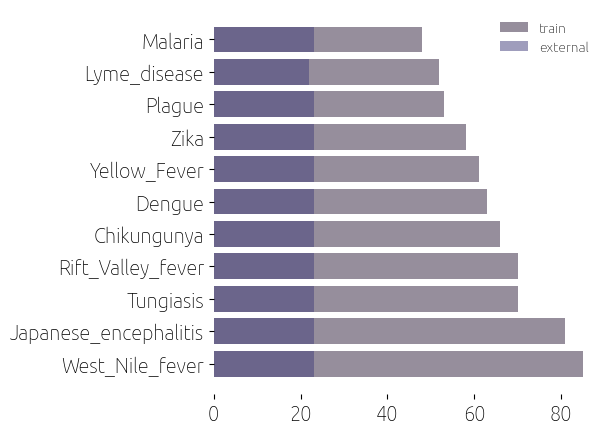

In [17]:
fig = plt.figure()
plt.barh(y = train_targets.index, width=train_targets.values, label = 'train', alpha = .5)
plt.barh(y = external_targets.index, width=external_targets.values, label = 'external', alpha = .5)
plt.box()
plt.legend()

In [18]:
# Flag data origin
train_data['external_data'] = 0
external_data['external_data'] = 1

In [19]:
sample_data

,id,prognosis
0,707,Dengue Zika Japanese_encephalitis
1,708,Dengue Zika Japanese_encephalitis
2,709,Dengue Zika Japanese_encephalitis
3,710,Dengue Zika Japanese_encephalitis
4,711,Dengue Zika Japanese_encephalitis
...,...,...
298,1005,Dengue Zika Japanese_encephalitis
299,1006,Dengue Zika Japanese_encephalitis
300,1007,Dengue Zika Japanese_encephalitis
301,1008,Dengue Zika Japanese_encephalitis


In [20]:
train_data.drop(['id'], axis = 1, inplace = True)
train_data.duplicated().value_counts()

False    707
dtype: int64

Apparently, no duplicates. 

In [21]:
external_data.duplicated().value_counts()

False    252
dtype: int64

In [22]:
train_extended = pd.concat([train_data, external_data])
train_extended.duplicated().value_counts()

False    959
dtype: int64

So, even if we merge the training data w/ the external one, there shouldn't be any duplicates.

In [23]:
# Missing values
train_extended.isna().value_counts()

sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  joint_pain  vomiting  rash   diarrhea  hypotension  pleural_effusion  ascites  gastro_bleeding  swelling  nausea  chills  myalgia  digestion_trouble  fatigue  skin_lesions  stomach_pain  orbital_pain  neck_pain  weakness  back_pain  weight_loss  gum_bleed  jaundice  coma   diziness  inflammation  red_eyes  loss_of_appetite  urination_loss  slow_heart_rate  abdominal_pain  light_sensitivity  yellow_skin  yellow_eyes  facial_distortion  microcephaly  rigor  bitter_tongue  convulsion  anemia  cocacola_urine  hypoglycemia  prostraction  hyperpyrexia  stiff_neck  irritability  confusion  tremor  paralysis  lymph_swells  breathing_restriction  toe_inflammation  finger_inflammation  lips_irritation  itchiness  ulcers  toenail_loss  speech_problem  bullseye_rash  prognosis  external_data
False         False     False        False       False        False       False     False  False     False        False             False    False 

In [24]:
# Binary columns count
(train_extended.nunique() == 2).value_counts()

True     65
False     1
dtype: int64

In [25]:
train_extended.prognosis.unique()

array(['Lyme_disease', 'Tungiasis', 'Zika', 'Rift_Valley_fever',
       'West_Nile_fever', 'Malaria', 'Chikungunya', 'Plague', 'Dengue',
       'Yellow_Fever', 'Japanese_encephalitis'], dtype=object)

In [26]:
train_ext_differences = (train_data.drop([TARGET, 'external_data'], axis = 1).apply(pd.Series.value_counts) / train_data.__len__()).diff().loc[1] \
 - (external_data.drop([TARGET, 'external_data'], axis = 1).apply(pd.Series.value_counts) / external_data.__len__()).diff().loc[1]
# external_data.drop([TARGET], axis = 1).apply(pd.Series.value_counts) / external_data.__len__()

In [27]:
train_ext_differences = train_ext_differences.sort_values(ascending=False)

Text(0.5, 1.0, 'Difference between the number of positive labels of binary features between train and external data \n\t - expressed as a percentage (%) -')

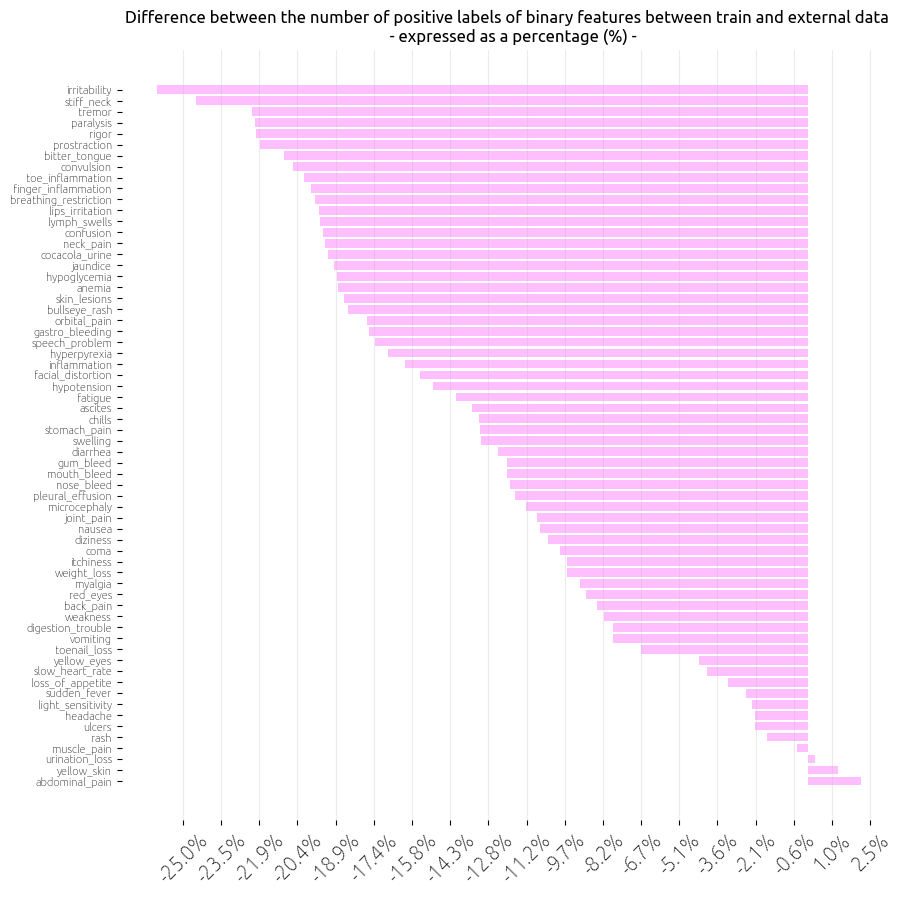

In [28]:
fig = plt.figure(figsize=(10,10))
plt.barh(y = train_ext_differences.index, width = train_ext_differences.values, color ='magenta', alpha = .25)
plt.grid(.99, axis = 'x')
plt.box()
plt.yticks(fontsize = 8)
plt.xticks(np.linspace(-.25, .025, 19), rotation = 45)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
plt.title(label  = 'Difference between the number of positive labels of binary features between train and external data \n\t - expressed as a percentage (%) -')

In [29]:
train_data.columns.tolist()

['sudden_fever',
 'headache',
 'mouth_bleed',
 'nose_bleed',
 'muscle_pain',
 'joint_pain',
 'vomiting',
 'rash',
 'diarrhea',
 'hypotension',
 'pleural_effusion',
 'ascites',
 'gastro_bleeding',
 'swelling',
 'nausea',
 'chills',
 'myalgia',
 'digestion_trouble',
 'fatigue',
 'skin_lesions',
 'stomach_pain',
 'orbital_pain',
 'neck_pain',
 'weakness',
 'back_pain',
 'weight_loss',
 'gum_bleed',
 'jaundice',
 'coma',
 'diziness',
 'inflammation',
 'red_eyes',
 'loss_of_appetite',
 'urination_loss',
 'slow_heart_rate',
 'abdominal_pain',
 'light_sensitivity',
 'yellow_skin',
 'yellow_eyes',
 'facial_distortion',
 'microcephaly',
 'rigor',
 'bitter_tongue',
 'convulsion',
 'anemia',
 'cocacola_urine',
 'hypoglycemia',
 'prostraction',
 'hyperpyrexia',
 'stiff_neck',
 'irritability',
 'confusion',
 'tremor',
 'paralysis',
 'lymph_swells',
 'breathing_restriction',
 'toe_inflammation',
 'finger_inflammation',
 'lips_irritation',
 'itchiness',
 'ulcers',
 'toenail_loss',
 'speech_problem',


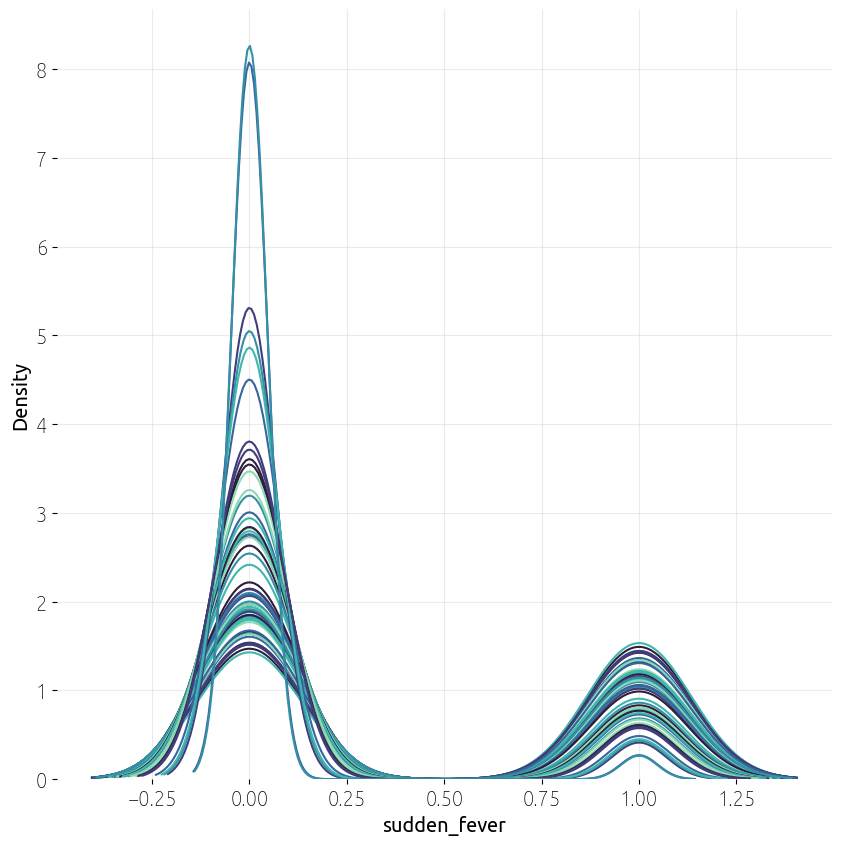

In [30]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

for feature in train_data.drop(['prognosis', 'external_data'], axis = 1).columns.tolist():
    sns.kdeplot(train_data[feature], label = feature)

ax.set_frame_on(False)
plt.grid()
plt.show()

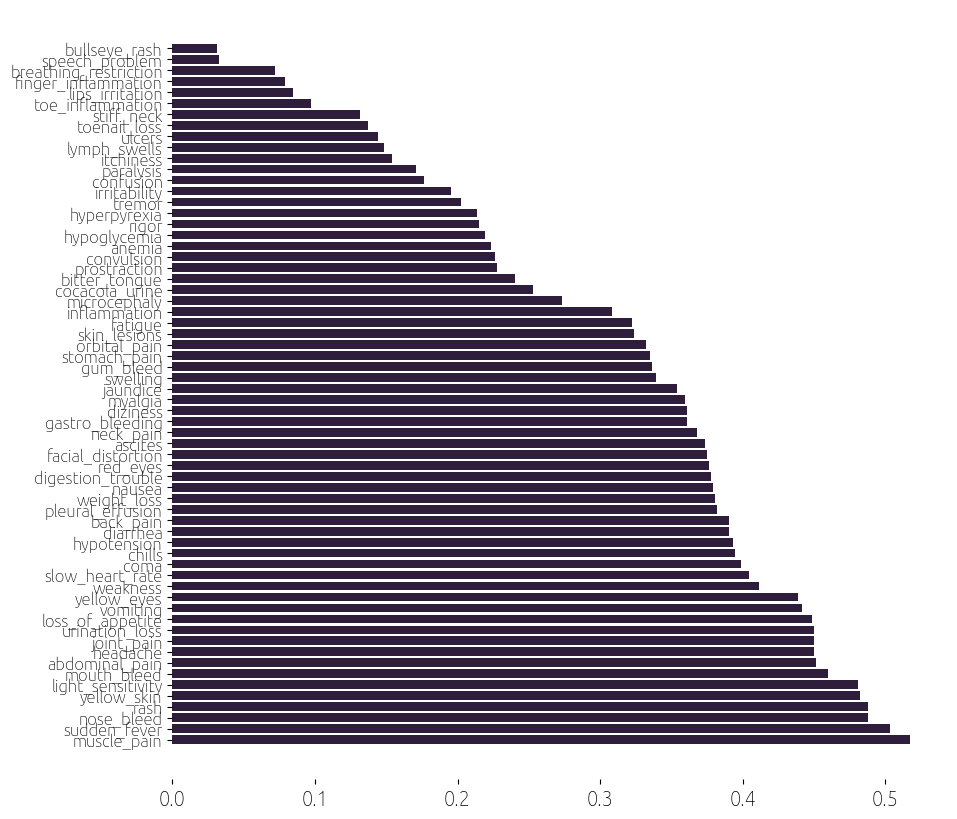

In [31]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
positive_features_norm = (train_data.loc[:, FEATURES].sum(axis = 0) / train_data.__len__()).sort_values(ascending=False)

plt.barh(positive_features_norm.index, positive_features_norm.values)
plt.yticks(fontsize =12)
plt.box()
plt.show()

In [33]:
train_data.loc[:, ((train_data.loc[:, FEATURES].sum(axis = 0) / train_data.__len__()) > .4).index.tolist()]

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
((train_data.loc[:, FEATURES].sum(axis = 0) / train_data.__len__()) > .4).to_frame()  

,0
sudden_fever,True
headache,True
mouth_bleed,True
nose_bleed,True
muscle_pain,True
...,...
itchiness,False
ulcers,False
toenail_loss,False
speech_problem,False


In [28]:
unique_targets = train_data[TARGET].unique().tolist()
print(len(unique_targets), "target categories")
for t in unique_targets:
    print(f'\t{t}')

11 target categories
	Lyme_disease
	Tungiasis
	Zika
	Rift_Valley_fever
	West_Nile_fever
	Malaria
	Chikungunya
	Plague
	Dengue
	Yellow_Fever
	Japanese_encephalitis


In [29]:
from distinctipy import distinctipy

# number of colours to generate
N = len(unique_targets)

# generate N visually distinct colours
colors = distinctipy.get_colors(N)

In [30]:
from cuml import TSNE, PCA
import umap

In [31]:
pca = PCA(n_components=2)

In [32]:
feature_subset = train_data.drop(['prognosis', 'external_data'], axis=1)

In [33]:
transformed_features = pca.fit_transform(feature_subset)
transformed_features.shape
drx_pca = [(c[0], c[1]) for c in transformed_features]
xs_pca, ys_pca = zip(*drx_pca)

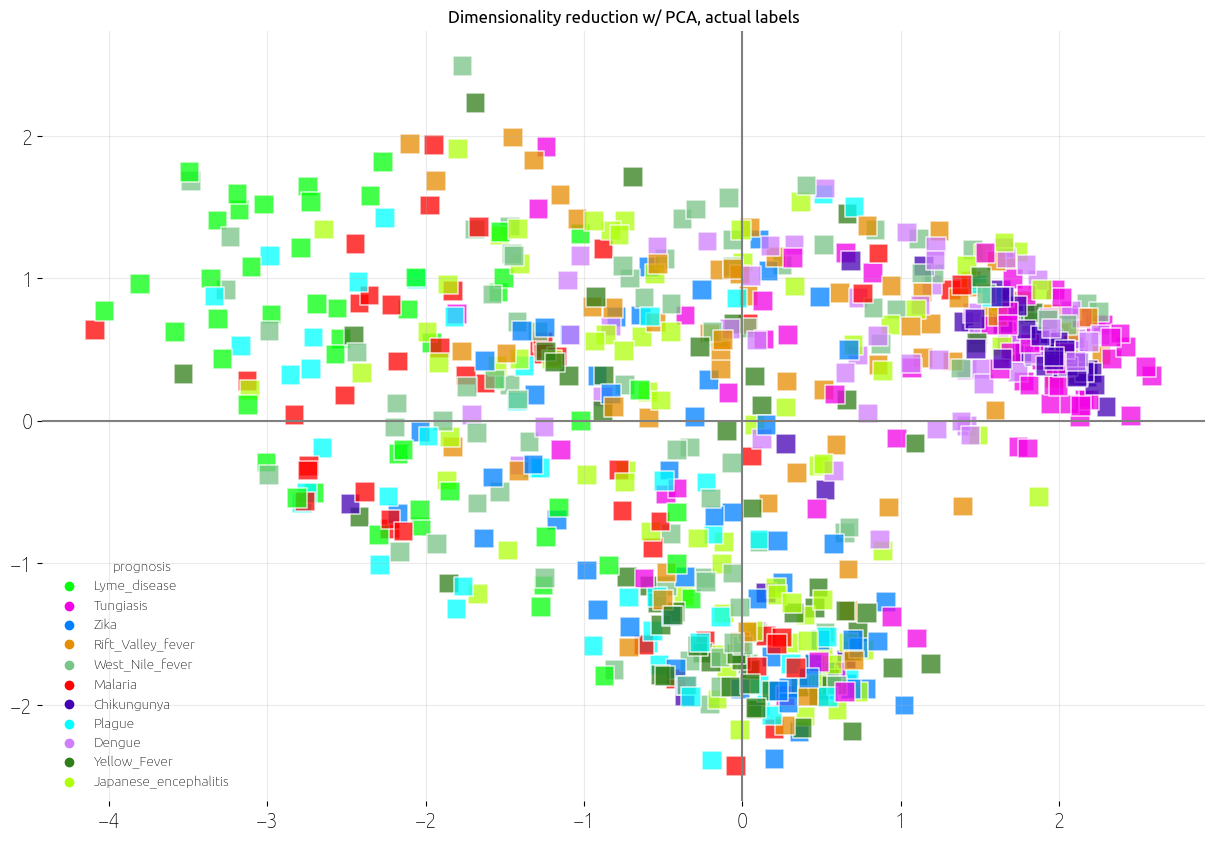

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x = xs_pca,y = ys_pca, hue = train_data[TARGET],  palette = colors, s = 200, alpha = .75, marker='s', edgecolor = 'white')
ax.set_title('Dimensionality reduction w/ PCA, actual labels')
ax.set_frame_on(False)
ax.grid(.25)
ax.axhline(0, color = 'gray')
ax.axvline(0, color = 'gray')
plt.show()


In [35]:
tsne = TSNE(n_components=2)

/home/mikhailtal/mambaforge/envs/rapids@22.12/lib/python3.9/site-packages/cuml/internals/api_decorators.py:794: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


In [36]:
transformed_features = tsne.fit_transform(feature_subset)
print(transformed_features.shape)
drx_tsne = [(c[0], c[1]) for c in transformed_features]
xs_tsne, ys_tsne = zip(*drx_tsne)

(707, 2)


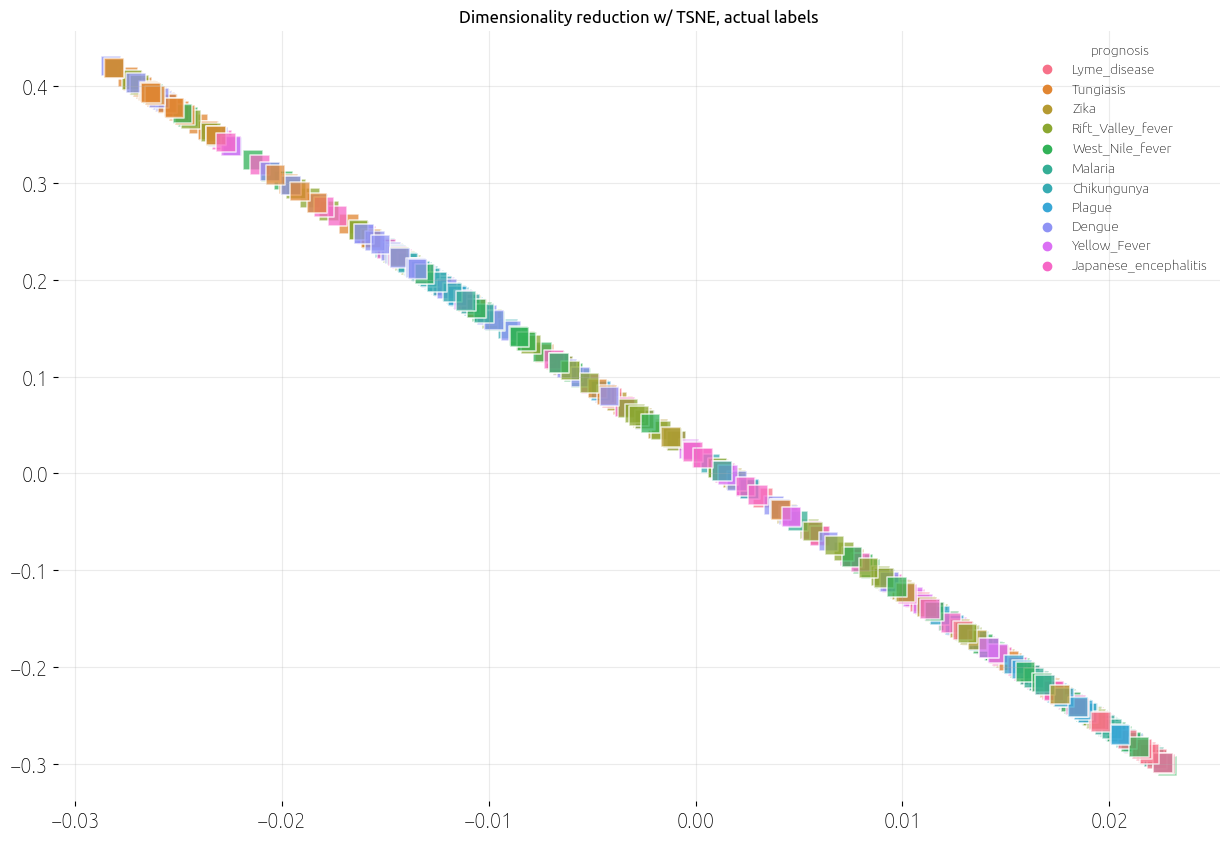

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x = xs_tsne,y = ys_tsne, hue = train_data[TARGET], s = 200, alpha = .75, marker='s', edgecolor = 'white')
ax.set_title('Dimensionality reduction w/ TSNE, actual labels')
ax.set_frame_on(False)
ax.grid(.25)
# ax.axhline(0, color = 'gray')
# ax.axvline(0, color = 'gray')
plt.show()


In [38]:
umap = umap.UMAP(n_components=2)

In [39]:
feature_subset = train_data.drop(['prognosis', 'external_data'], axis=1)

transformed_features = umap.fit_transform(feature_subset)
print(transformed_features.shape)
drx_umap = [(c[0], c[1]) for c in transformed_features]
xs_umap, ys_umap = zip(*drx_umap)

(707, 2)


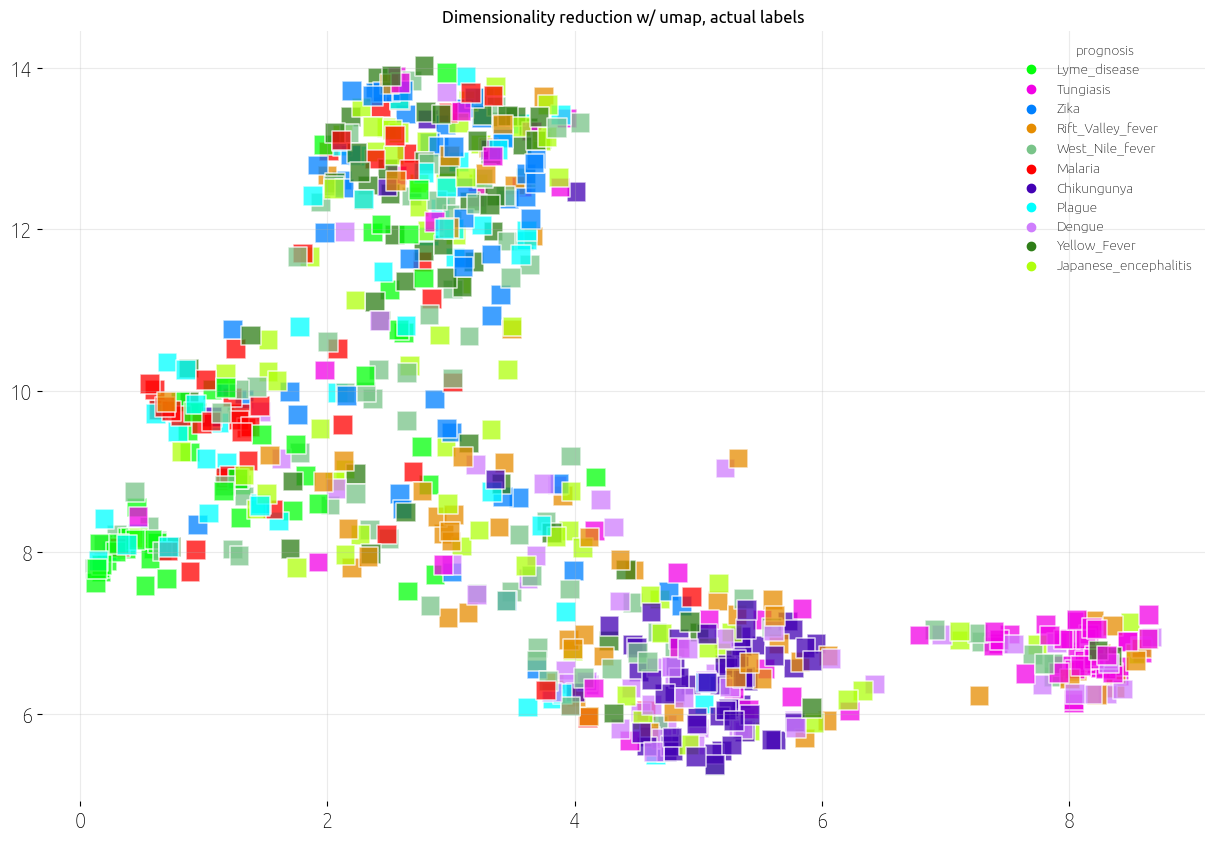

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x = xs_umap,y = ys_umap, hue = train_data[TARGET], palette = colors, s = 200, alpha = .75, marker='s', edgecolor = 'white')
ax.set_title('Dimensionality reduction w/ umap, actual labels')
ax.set_frame_on(False)
ax.grid(.25)
# ax.axhline(0, color = 'gray')
# ax.axvline(0, color = 'gray')
plt.show()
